<a href="https://colab.research.google.com/github/SangamSilwal/DeepLearning_DSeries/blob/main/D8_DropOut_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [20]:
X, y = make_regression(
    n_samples=50,
    n_features=1,
    noise=10,
    bias=5,
    random_state=42
)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

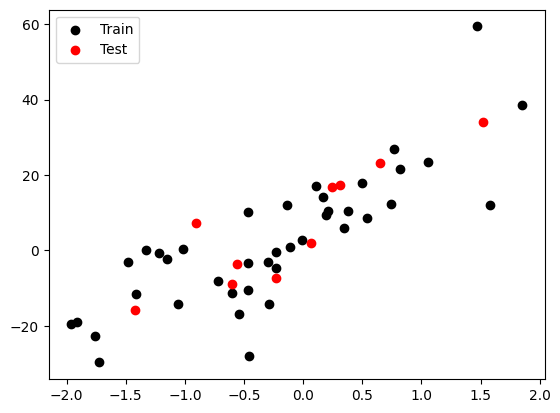

In [22]:
plt.scatter(X_train,y_train,c="black",label='Train')
plt.scatter(X_test,y_test,c="red",label='Test')
plt.legend()
plt.show()

# Regression Model Without Dropout

In [23]:
model = Sequential()

model.add(Dense(128,input_dim=1,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="linear"))

adam = Adam(learning_rate=0.01)
model.compile(loss="mse",optimizer=adam,metrics=["mse"])
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
_,train_mse = model.evaluate(X_train,y_train,verbose=0)
_,test_mse = model.evaluate(X_test,y_test,verbose=0)
print('Train: {}, Test: {}'.format(train_mse,test_mse))

Train: 77.49751281738281, Test: 39.91492462158203


In [25]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


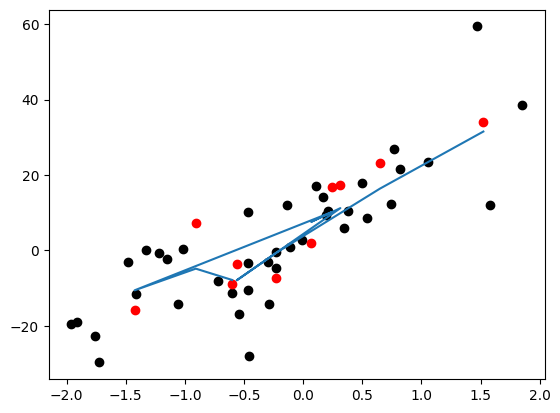

In [26]:
plt.figure()
plt.scatter(X_train,y_train,c="black",label='Train')
plt.scatter(X_test,y_test,c="red",label='Test')
plt.plot(X_test,y_pred)

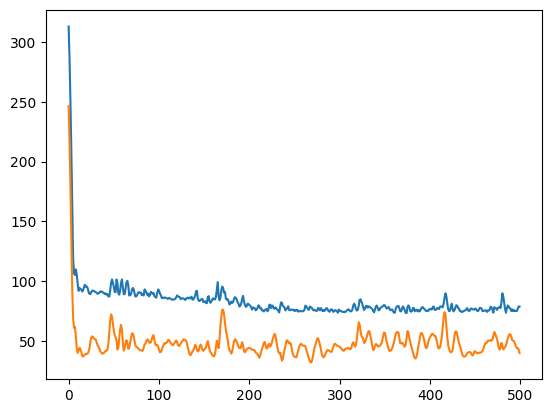

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Dropout Model

In [28]:
model = Sequential()

model.add(Dense(128,input_dim=1,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="linear"))

adam = Adam(learning_rate=0.01)
model.compile(loss="mse",optimizer=adam,metrics=["mse"])
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
_,train_mse = model.evaluate(X_train,y_train,verbose=0)
_,test_mse = model.evaluate(X_test,y_test,verbose=0)
print('Train: {}, Test: {}'.format(train_mse,test_mse))

Train: 77.44459533691406, Test: 55.12709426879883


In [30]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


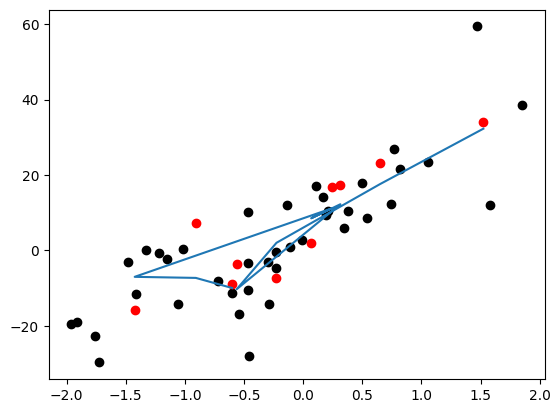

In [31]:
plt.figure()
plt.scatter(X_train,y_train,c="black",label='Train')
plt.scatter(X_test,y_test,c="red",label='Test')
plt.plot(X_test,y_pred)